# Multiclass Classification(KNN)
    - more then 3 categorical

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
dat = pd.read_csv("../data/wine.csv")

In [3]:
dat.head(n=3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0


In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       176 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

In [5]:
dat.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [6]:
dat.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,176.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,173.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.989091,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.362370,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.804431,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.126153,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.355000,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.260000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.672500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.450000,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.750000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [7]:
dat['class'].nunique() # number of classes

3

In [8]:
dat['class'].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

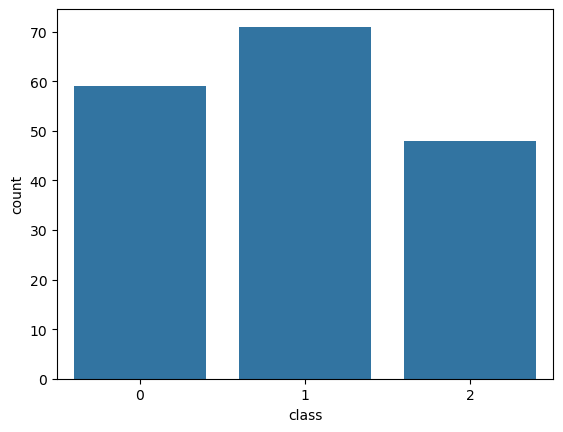

In [9]:
sns.countplot(data=dat, x="class")
#sns.countplot(data['class'])
plt.show()

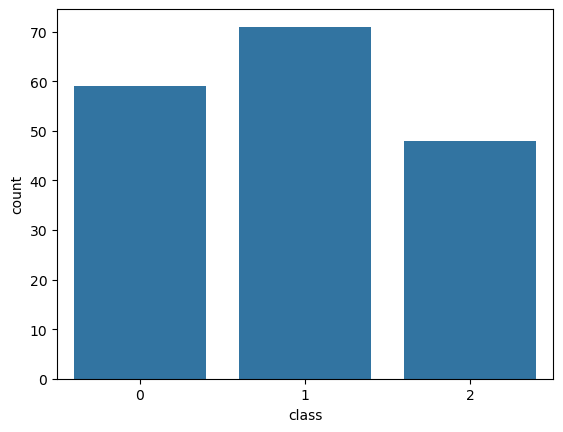

In [10]:
sns.barplot(x=dat['class'].value_counts().index, y= dat['class'].value_counts())
plt.show()

In [11]:
dat.isnull()
# same as dat.isna(), is an alias of isnull function !

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
dat.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [13]:
dat.isna().mean()

alcohol                         0.011236
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
flavanoids                      0.000000
nonflavanoid_phenols            0.028090
proanthocyanins                 0.000000
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
class                           0.000000
dtype: float64

---

# Deal with missing value

In [14]:
dat.dropna() # delete row which has missing value

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [15]:
dat.dropna(subset=['alcohol']) # specific columns which have NaN

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [16]:
dat.drop(['alcohol', 'nonflavanoid_phenols'], axis=1) # delete columns

,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.71,2.43,15.6,127,2.80,3.06,2.29,5.64,1.04,3.92,1065,0
1,1.78,2.14,11.2,100,2.65,2.76,1.28,4.38,1.05,3.40,1050,0
2,2.36,2.67,18.6,101,2.80,3.24,2.81,5.68,1.03,3.17,1185,0
3,1.95,2.50,16.8,113,3.85,3.49,2.18,7.80,0.86,3.45,1480,0
4,2.59,2.87,21.0,118,2.80,2.69,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...
173,5.65,2.45,20.5,95,1.68,0.61,1.06,7.70,0.64,1.74,740,2
174,3.91,2.48,23.0,102,1.80,0.75,1.41,7.30,0.70,1.56,750,2
175,4.28,2.26,20.0,120,1.59,0.69,1.35,10.20,0.59,1.56,835,2
176,2.59,2.37,20.0,120,1.65,0.68,1.46,9.30,0.60,1.62,840,2


In [17]:
dat.fillna(dat.median(), inplace=True) # replace NaN

---

# Scaling
    - use only Train_set, and exclude dependence variable

In [19]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [20]:
# Standard Scaling
st_scalar = StandardScaler()

In [21]:
st_scalar.fit(dat)

StandardScaler()

In [22]:
st_scaled = st_scalar.transform(dat)

In [23]:
st_scaled_df = pd.DataFrame(st_scaled, columns=dat.columns)

In [24]:
# Robust Scaling
rb_sclar = RobustScaler()

In [25]:
rb_sclar.fit(dat)

RobustScaler()

In [26]:
rb_scaled_df = pd.DataFrame(rb_sclar.transform(dat), columns=dat.columns)

In [27]:
# Min-max Scaling
mm_scaler = MinMaxScaler()

In [28]:
mm_scaler_df = pd.DataFrame(mm_scaler.fit_transform(dat), columns=dat.columns)

In [29]:
# standard scaling
round(st_scaled_df.describe(), 2)
# mean : 0 / standard deviation : 1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.46,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49,-1.21
25%,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78,-1.21
50%,0.08,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23,0.08
75%,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76,1.37
max,2.21,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97,1.37


In [30]:
# robust scaling
# less effected by outliers(using quntaile value)
round(rb_scaled_df.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.05,0.32,0.02,-0.00,0.09,-0.06,-0.06,0.13,0.05,0.12,-0.02,-0.14,0.15,-0.03
std,0.62,0.75,0.79,0.78,0.75,0.59,0.60,0.74,0.82,0.78,0.68,0.58,0.65,0.39
min,-1.55,-0.76,-2.88,-2.07,-1.47,-1.30,-1.07,-1.25,-1.64,-1.14,-1.44,-1.23,-0.82,-0.50
25%,-0.53,-0.18,-0.43,-0.53,-0.53,-0.58,-0.56,-0.42,-0.44,-0.49,-0.54,-0.68,-0.36,-0.50
50%,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
75%,0.47,0.82,0.57,0.47,0.47,0.42,0.44,0.58,0.56,0.51,0.46,0.32,0.64,0.50
max,1.31,2.66,2.50,2.44,3.37,1.44,1.76,1.91,2.89,2.79,2.21,0.99,2.08,0.50


In [31]:
# min-max scaling(0~1)
# maintaining original distribution of data.
round(mm_scaler_df.describe(), 2)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,0.53,0.32,0.54,0.46,0.32,0.45,0.36,0.44,0.37,0.32,0.39,0.49,0.33,0.47
std,0.22,0.22,0.15,0.17,0.16,0.22,0.21,0.23,0.18,0.20,0.19,0.26,0.22,0.39
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.36,0.17,0.45,0.34,0.20,0.26,0.18,0.26,0.26,0.17,0.25,0.24,0.16,0.00
50%,0.54,0.22,0.53,0.46,0.30,0.47,0.38,0.40,0.36,0.29,0.39,0.55,0.28,0.50
75%,0.71,0.46,0.64,0.56,0.40,0.63,0.53,0.58,0.49,0.42,0.52,0.70,0.50,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [32]:
X = dat.drop(['class'], axis=1)
y = dat['class']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2,random_state=100)

In [35]:
mm_scaler = MinMaxScaler()

In [36]:
mm_scaler.fit(X_train)

MinMaxScaler()

In [37]:
scaled_X_train = mm_scaler.transform(X_train)
scaled_X_test = mm_scaler.transform(X_test)

In [38]:
scaled_X_test[:3]

array([[0.16397849, 0.26086957, 0.58823529, 0.56701031, 0.20289855,
        0.3057554 , 0.26464208, 0.63265306, 0.29652997, 0.16170213,
        0.38793103, 0.54212454, 0.28673324],
       [0.65860215, 0.18379447, 0.68449198, 0.61340206, 0.27536232,
        0.53956835, 0.13665944, 0.71428571, 0.59305994, 1.11382979,
        0.01724138, 0.18681319, 0.24393723],
       [0.83064516, 0.14624506, 0.51336898, 0.31958763, 0.36231884,
        0.39568345, 0.42516269, 0.18367347, 0.3659306 , 0.39574468,
        0.53448276, 0.56776557, 0.7146933 ]])

In [39]:
mm_scaler = MinMaxScaler()

In [40]:
scaled_X_train = mm_scaler.fit_transform(X_train)

In [41]:
scaled_X_test = mm_scaler.transform(X_test)

---

# KNN algorithms

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [43]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [44]:
pred = knn.predict(scaled_X_test)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred) # 88% prediction !

0.8888888888888888

---

# Hyper Parameter Tunning
    - adjust model 
    - explain later(random forest .. maybe)

In [51]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(scaled_X_train, y_train)
pred = knn.predict(scaled_X_test)
accuracy_score(y_test, pred)

0.9166666666666666

In [48]:
len(X_train)

142

In [56]:
for i in range(1, len(X_train)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train, y_train)
    pred = knn.predict(scaled_X_test)
    print(accuracy_score(y_test, pred), i)
    # i : 13 accuracy_score is max.

0.9166666666666666 1
0.8888888888888888 2
0.8888888888888888 3
0.9166666666666666 4
0.8888888888888888 5
0.9166666666666666 6
0.9166666666666666 7
0.8888888888888888 8
0.8888888888888888 9
0.8888888888888888 10
0.9166666666666666 11
0.9166666666666666 12
0.9722222222222222 13
0.9444444444444444 14
0.9444444444444444 15
0.9444444444444444 16
0.9166666666666666 17
0.9722222222222222 18
0.9444444444444444 19
0.9722222222222222 20
0.9444444444444444 21
0.9444444444444444 22
0.9444444444444444 23
0.9444444444444444 24
0.9444444444444444 25
0.9444444444444444 26
0.9444444444444444 27
0.9444444444444444 28
0.9166666666666666 29
0.9444444444444444 30
0.9444444444444444 31
0.9722222222222222 32
0.9166666666666666 33
0.9444444444444444 34
0.9444444444444444 35
0.9444444444444444 36
0.9444444444444444 37
0.8888888888888888 38
0.9166666666666666 39
0.9166666666666666 40
0.9166666666666666 41
0.9166666666666666 42
0.9166666666666666 43
0.9444444444444444 44
0.9166666666666666 45
0.9166666666666666 

In [59]:
accuracy_score_list = list()
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train, y_train)
    pred = knn.predict(scaled_X_test)
    accuracy_score_list.append(accuracy_score(y_test, pred))
print(accuracy_score_list)

[0.9166666666666666, 0.8888888888888888, 0.8888888888888888, 0.9166666666666666, 0.8888888888888888, 0.9166666666666666, 0.9166666666666666, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.9166666666666666, 0.9166666666666666, 0.9722222222222222, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9166666666666666, 0.9722222222222222, 0.9444444444444444, 0.9722222222222222, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9166666666666666]


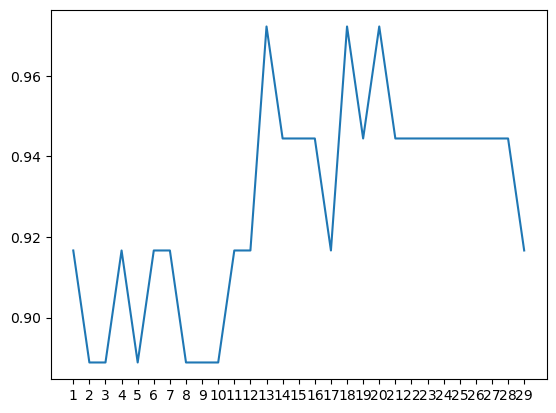

In [63]:
sns.lineplot(x=range(1, 30), y=accuracy_score_list)
plt.xticks(range(1, 30))
plt.show()
# x : n_neighboors
# y : accuracy score